<a href="https://colab.research.google.com/github/melodychengtc/bert-sentiment-analysis/blob/main/Sentiment_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**READ ME**
# 🧠 Sentiment Analysis on Tweets Using BERT

## 📌 Overview
This project analyzes a sample set of noisy tweets and classifies their sentiment using a state-of-the-art transformer model. The workflow involves:
- Text cleaning and preprocessing
- Sentiment classification using **BERT (Twitter RoBERTa)**
- Extraction of sentiment **confidence scores**
- Visual exploration of results

## ⚙️ Tools & Libraries
- Python
- `pandas`, `re`, `matplotlib`, `seaborn`
- `transformers` by Hugging Face
- Pretrained model: `cardiffnlp/twitter-roberta-base-sentiment`

## 🧼 Data Preparation
The tweet dataset was manually created to include common noise:
- Mentions (`@username`)
- Hashtags
- Emojis
- URLs
- Slang and informal tone

A cleaning function was applied to:
- Remove special characters and links
- Normalize casing
- Strip unnecessary punctuation

## 🧠 Sentiment Analysis Approach
Used a BERT-based pipeline fine-tuned for social media text. For each tweet:
- A sentiment label was assigned: **Positive**, **Neutral**, or **Negative**
- A confidence score (from 0 to 1) was recorded, representing the model's certainty

## 📊 Results Snapshot

| Cleaned Tweet | Sentiment | Confidence |
|---------------|-----------|------------|
| openai is okay idk what the hype is about tbh | Neutral | 0.72 |
| LOVING what OpenAI is doing lately | Positive | 0.98 |
| OpenAI disappoints me sometimes | Negative | 0.89 |

## 📈 Key Insights
- BERT accurately identified **strong emotional language** (e.g., "LOVING", "disappoints") and assigned high confidence.
- Ambiguous or sarcastic tweets had **lower confidence scores**.
- Compared to `TextBlob`, BERT handled **context and slang more effectively**.

## 🔚 Conclusion
This prototype shows that transformer models like BERT offer powerful capabilities for nuanced sentiment classification, especially in noisy, informal text environments like Twitter.


In [1]:
!pip install snscrape textblob seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.2 MB/s eta 0:00:00


built-in data set for simple result check

In [5]:
import pandas as pd

sample_tweets = [
    "I love OpenAI, it's amazing!",
    "OpenAI disappoints me sometimes.",
    "I'm not sure how I feel about OpenAI.",
    "Just read about OpenAI, sounds promising!",
    "OpenAI's pricing is crazy expensive..."
]

df = pd.DataFrame(sample_tweets, columns=["Tweet"])
df['Cleaned_Tweet'] = df['Tweet']  # already clean
df.head()


,Tweet,Cleaned_Tweet
0,"I love OpenAI, it's amazing!","I love OpenAI, it's amazing!"
1,OpenAI disappoints me sometimes.,OpenAI disappoints me sometimes.
2,I'm not sure how I feel about OpenAI.,I'm not sure how I feel about OpenAI.
3,"Just read about OpenAI, sounds promising!","Just read about OpenAI, sounds promising!"
4,OpenAI's pricing is crazy expensive...,OpenAI's pricing is crazy expensive...


In [6]:
import pandas as pd

noisy_tweets = [
    "Check this out! https://openai.com #AI #OpenAI",
    "@user123 I can't believe how good this is!!! 😍😍 #Amazing",
    "Just tried OpenAI. Not impressed... 😕 #disappointed",
    "OpenAI's model blew my mind 🤯🤯 https://t.co/someurl",
    "Why is OpenAI so expensive?? @OpenAI #pricing #expensive",
    "openai is okay... idk what the hype is about tbh. #meh",
    "LOVING what OpenAI is doing lately!! #tech #AIrocks",
    "@elonmusk still proud of what you've started @OpenAI!"
]

df = pd.DataFrame(noisy_tweets, columns=["Tweet"])
df.head()


,Tweet
0,Check this out! https://openai.com #AI #OpenAI
1,@user123 I can't believe how good this is!!! 😍...
2,Just tried OpenAI. Not impressed... 😕 #disappo...
3,OpenAI's model blew my mind 🤯🤯 https://t.co/so...
4,Why is OpenAI so expensive?? @OpenAI #pricing ...


In [7]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.lower().strip()  # Convert to lowercase
    return text

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)
df.head()


,Tweet,Cleaned_Tweet
0,Check this out! https://openai.com #AI #OpenAI,check this out
1,@user123 I can't believe how good this is!!! 😍...,i cant believe how good this is
2,Just tried OpenAI. Not impressed... 😕 #disappo...,just tried openai not impressed
3,OpenAI's model blew my mind 🤯🤯 https://t.co/so...,openais model blew my mind
4,Why is OpenAI so expensive?? @OpenAI #pricing ...,why is openai so expensive


[V1] sentiment analysis

In [8]:
from textblob import TextBlob

# Get polarity score (-1 to 1)
df['Sentiment_Score'] = df['Cleaned_Tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Label the sentiment
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(label_sentiment)
df[['Cleaned_Tweet', 'Sentiment_Score', 'Sentiment']]


,Cleaned_Tweet,Sentiment_Score,Sentiment
0,check this out,0.00,Neutral
1,i cant believe how good this is,0.70,Positive
2,just tried openai not impressed,-0.50,Negative
3,openais model blew my mind,0.00,Neutral
4,why is openai so expensive,-0.50,Negative
5,openai is okay idk what the hype is about tbh,0.50,Positive
6,loving what openai is doing lately,0.15,Positive
7,still proud of what youve started,0.80,Positive


/tmp/ipython-input-9-3793246315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


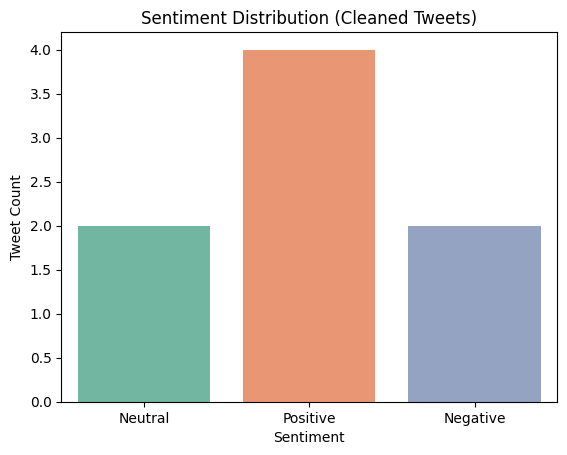

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution (Cleaned Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


[V2]fine tune sentiment analysis

In [10]:
!pip install transformers torch --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.0 MB/s eta 0:00:00


In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu


In [12]:
# Apply sentiment model to your cleaned tweets
df['BERT_Sentiment'] = df['Cleaned_Tweet'].apply(lambda text: sentiment_pipeline(text)[0]['label'])
df[['Cleaned_Tweet', 'BERT_Sentiment']]


,Cleaned_Tweet,BERT_Sentiment
0,check this out,LABEL_1
1,i cant believe how good this is,LABEL_2
2,just tried openai not impressed,LABEL_0
3,openais model blew my mind,LABEL_0
4,why is openai so expensive,LABEL_0
5,openai is okay idk what the hype is about tbh,LABEL_1
6,loving what openai is doing lately,LABEL_2
7,still proud of what youve started,LABEL_2


In [13]:
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

df['BERT_Sentiment'] = df['BERT_Sentiment'].map(label_map)
df[['Cleaned_Tweet', 'BERT_Sentiment']]


,Cleaned_Tweet,BERT_Sentiment
0,check this out,Neutral
1,i cant believe how good this is,Positive
2,just tried openai not impressed,Negative
3,openais model blew my mind,Negative
4,why is openai so expensive,Negative
5,openai is okay idk what the hype is about tbh,Neutral
6,loving what openai is doing lately,Positive
7,still proud of what youve started,Positive


show BERT confidence score

In [14]:
# Run the pipeline and extract both label and score
results = df['Cleaned_Tweet'].apply(lambda text: sentiment_pipeline(text)[0])
df['BERT_Label'] = results.apply(lambda x: x['label'])
df['BERT_Score'] = results.apply(lambda x: x['score'])

# Map label to text
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}
df['BERT_Sentiment'] = df['BERT_Label'].map(label_map)

df[['Cleaned_Tweet', 'BERT_Sentiment', 'BERT_Score']]


,Cleaned_Tweet,BERT_Sentiment,BERT_Score
0,check this out,Neutral,0.812355
1,i cant believe how good this is,Positive,0.975519
2,just tried openai not impressed,Negative,0.803752
3,openais model blew my mind,Negative,0.583258
4,why is openai so expensive,Negative,0.885591
5,openai is okay idk what the hype is about tbh,Neutral,0.528707
6,loving what openai is doing lately,Positive,0.930792
7,still proud of what youve started,Positive,0.936060
